# Outline
* 1. [Advanced Visualization in Python](#visualization)
        - [Matplotlib](#matplotlib)
        - [Seaborn](#seaborn)
* 2. [Exploratory Analysis Example on Titanic Data](#EDA)


<a id='matplotlib'></a>
## 1. Advanced Visualization in Python
### Matplotlib
<font size="3">Matplotlib is the 'Godfather' of Python data visualization libraries.It's the first Python data visualization library and so many other libraries are built on top of it or designed to work in tandem with it during analysis. Some libraries like pandas and Seaborn are wrappers over matplotlib.**Low-level, provides lots of freedom.**</font>
* **3 Layers**:
    - Backend layer: conenct the graph with notebook
    - Artist layer: every element is an artist, eg: figure, axes, axis, etc
    - Scripting layer: pyplot, simplfy syntex
    
[Matplotlib Documentation](https://matplotlib.org/index.html)<br>
[Matplotlib Colormaps](https://matplotlib.org/tutorials/colors/colormaps.html)
<img src="day1 data and image/figure.png">

In [1]:
# ![title](figure.png)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<IPython.core.display.Javascript object>


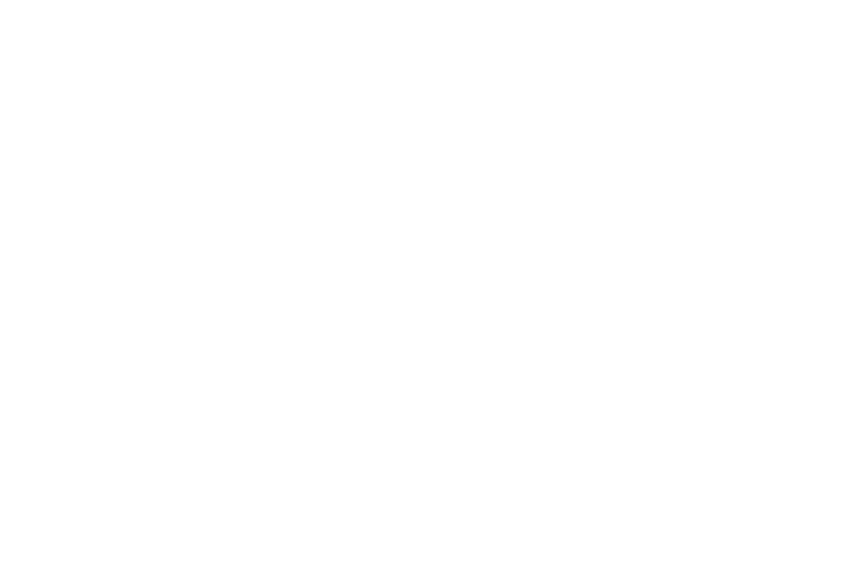

In [3]:
%matplotlib notebook
plt.plot([1,2,3],[2,3,4])

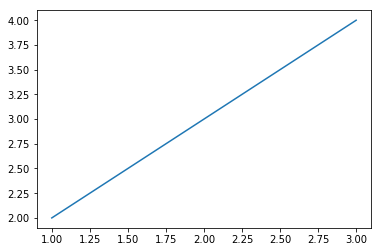

In [4]:
%matplotlib inline
plt.plot([1,2,3],[2,3,4])

Text(0.5, 1.0, 'Test figure')

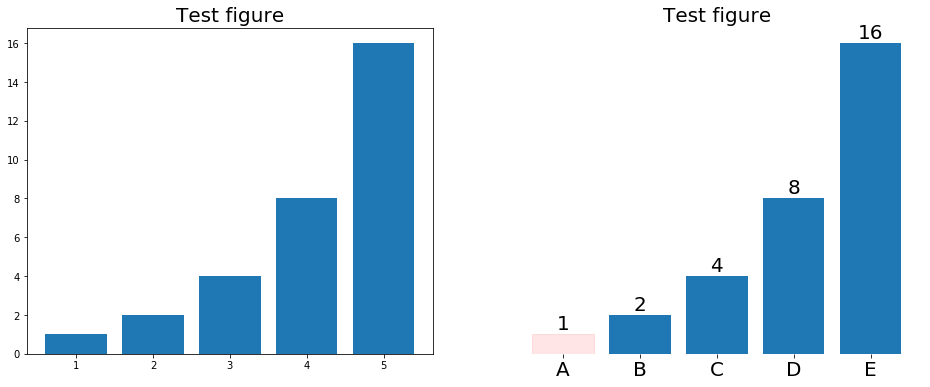

In [5]:
fig = plt.figure(figsize=[16, 6])

ax1 = fig.add_subplot(1,2,1) # 1 row, 2 cols, the 1st plot
rects1 = ax1.bar([1,2,3,4,5], [1,2,4,8,16])

ax = fig.add_subplot(1,2,2)
rects = ax.bar([1,2,3,4,5], [1,2,4,8,16])
ax.xaxis.set_visible(True)
ax.yaxis.set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks([1,2,3,4,5])
ax.set_xticklabels(['A', 'B', 'C', 'D', 'E'],fontdict={'fontsize': 20})

tmp = rects[0] # the 1st rectangular 
tmp.set_color('red')
tmp.set_alpha(0.1)

for rect in rects:
    height = rect.get_height()
    ax.text(rect.get_x()+ rect.get_width()/2.,
            height + 0.05,
            '{0}'.format(int(height)), # '%d' % int(height),
            fontdict={'fontsize': 20},
            ha='center',va='bottom') # regarding the numbers

ax1.set_title('Test figure',fontdict={'fontsize': '20'})
ax.set_title('Test figure',fontdict={'fontsize': '20'})

In [6]:
rects[0].get_x(), rects[0].get_y() # get_xy()

(0.6, 0)

In [7]:
rects[0].get_height()

1

<a id='seaborn'></a>
### Seaborn
<font size = '3'>Seaborn harnesses the power of matplotlib to create beautiful charts by allowing you to access a number of matplotlib’s methods with less code.The key difference is Seaborn’s default styles and color palettes, which are designed to be more aesthetically pleasing and modern. Since Seaborn is built on top of matplotlib, you will need to know matplotlib to tweak Seaborn’s defaults.**High-level interface, great default styles.**</font>

[Seaborn Documentation](https://seaborn.pydata.org/)

[Seaborn Color Palettes](https://seaborn.pydata.org/tutorial/color_palettes.html)

In [8]:
import seaborn as sns

In [9]:
df1 = pd.read_csv('train.csv')
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


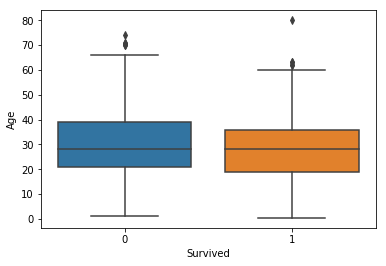

In [10]:
sns.boxplot(data=df1, x = 'Survived', y= 'Age')

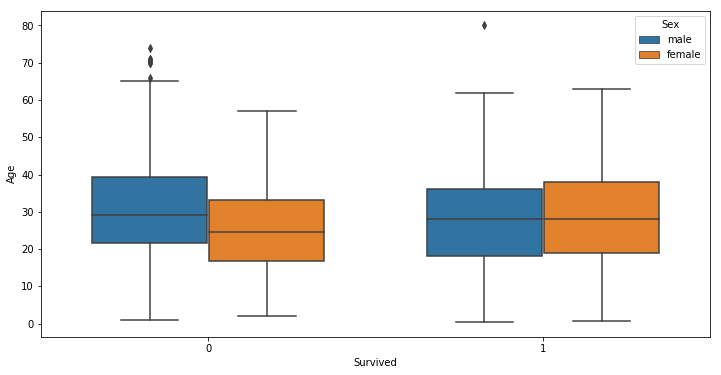

In [11]:
fig,ax = plt.subplots(figsize = [12,6])
ax = sns.boxplot(data=df1, x = 'Survived', y= 'Age', hue = 'Sex', width= 0.7)

/Users/rexitim/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


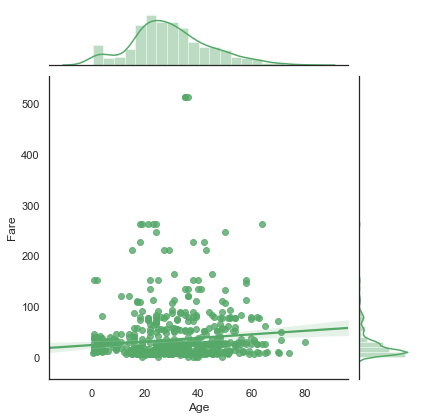

In [12]:
sns.set(style="white", color_codes=True)
sns.jointplot(data=df1, x='Age', y='Fare', kind='reg', color='g')

In [13]:
num_features = df1.select_dtypes(include=[np.number])
num_features = num_features.drop('PassengerId', axis = 1)
num_features.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833


/Users/rexitim/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/rexitim/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


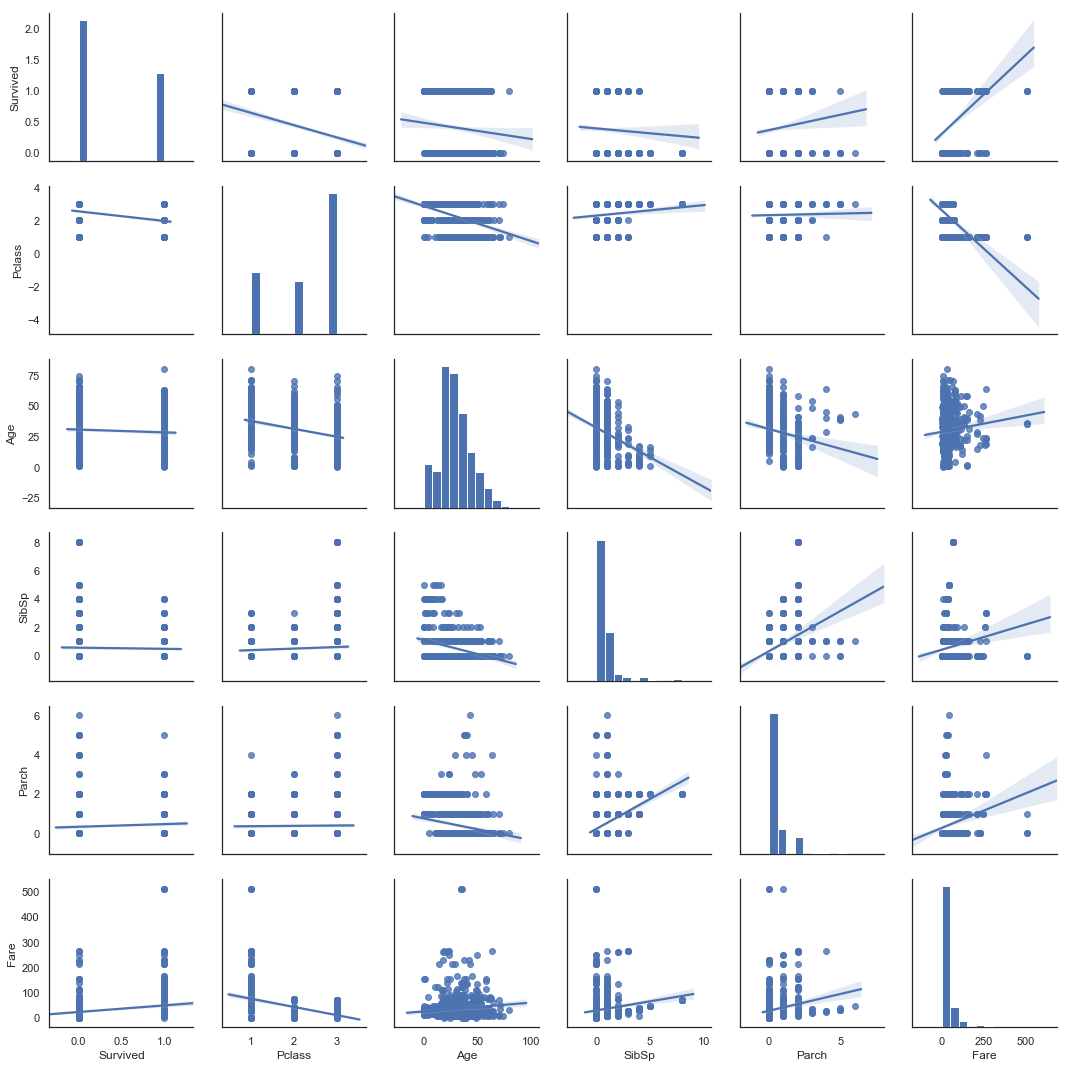

In [14]:
sns.pairplot(num_features, kind = 'reg')

In [15]:
# df1.drop('Cabin', axis = 1)\
#     .assign(Age = lambda x: x['Age'].fillna(20))\
#     .loc[lambda x: x['Embarked'].notnull()].shape

<a id='EDA'></a>
## 2. Exploratory Analysis Example on Titanic Data

**Survived**

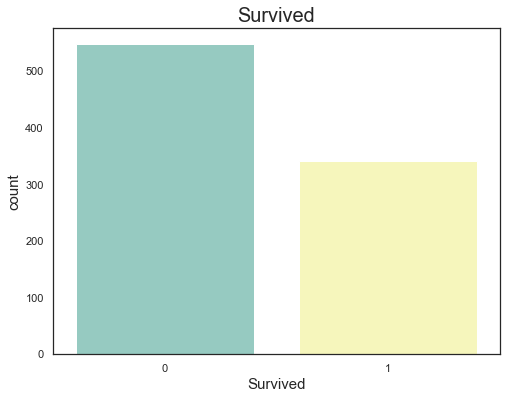

In [16]:
fig, ax = plt.subplots(figsize = [8,6])
surv = sns.countplot(x='Survived', data = df1,palette='Set3')
surv.set_title('Survived', fontdict = {'fontsize':'20'})

# change label size 
x_lab, y_lab = surv.get_xlabel(), surv.get_ylabel()
surv.set_xlabel(x_lab,fontdict = {'fontsize':'15'})
surv.set_ylabel(y_lab,fontdict = {'fontsize':'15'})
plt.show()

### Categorical
* **Sex**

In [17]:
df1.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

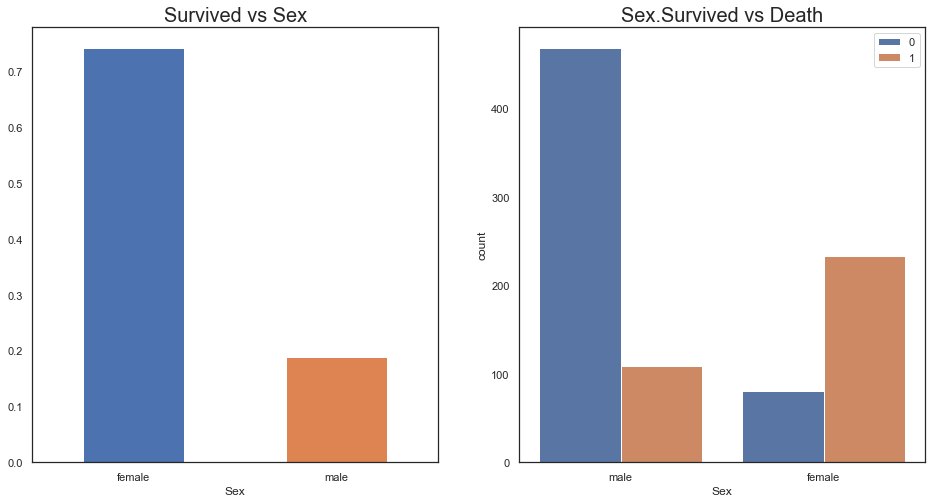

In [18]:
fig,ax = plt.subplots(1,2,figsize = [16,8])

df1[['Sex','Survived']].groupby(['Sex'])['Survived'].mean().plot.bar(ax = ax[0], rot = 0)
ax[0].set_title('Survived vs Sex', fontdict = {'fontsize':'20'})

sns.countplot(x='Sex',hue='Survived', data=df1, ax=ax[1])
ax[1].set_title('Sex.Survived vs Death', fontdict={'fontsize':'20'})
ax[1].legend(loc='best') # try 'upper center' 

plt.show()

* **Embarked**

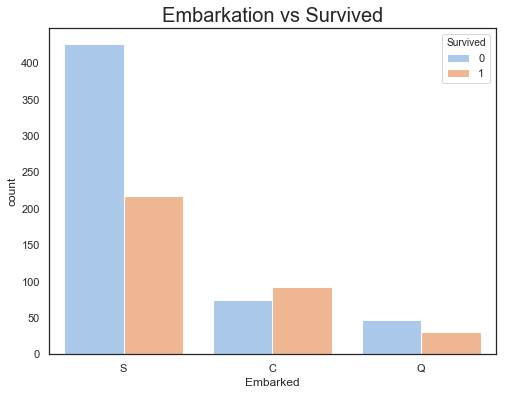

In [19]:
fig,ax = plt.subplots(figsize=[8,6])
sns.countplot(x='Embarked',hue='Survived',palette='pastel',data=df1,ax=ax)
ax.set_title('Embarkation vs Survived',fontsize=20)
plt.show()

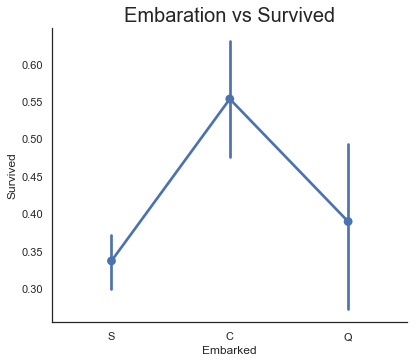

In [20]:
# catplot: figure level 
g = sns.catplot(x='Embarked',y='Survived',kind='point',aspect=1.2,data=df1)
ax = plt.gca() # To get the current polar axes on the current figure
ax.set_title('Embaration vs Survived', fontsize=20)

plt.show()

### Ordinal Feature
* **Pclass**

In [21]:
pd.crosstab([df1['Sex'],df1['Pclass']],df1['Survived'],margins=True)\
    .style\
    .background_gradient(cmap='cool')
# percentage: apply(lambda x: x/x.sum(), axis=1)

/Users/rexitim/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


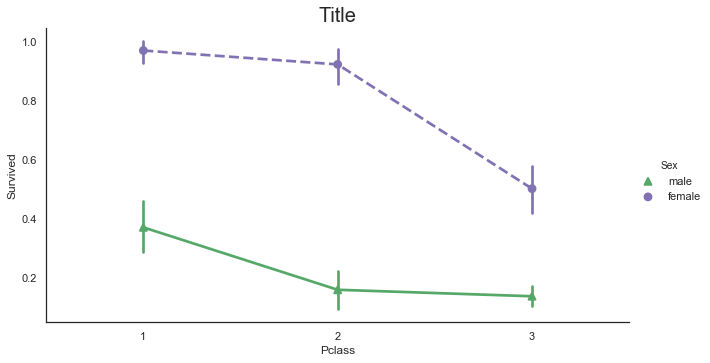

In [22]:
sns.catplot(x='Pclass', y='Survived',hue='Sex',palette={"male": "g", "female": "m"},
            markers=["^", "o"], linestyles=["-", "--"],
            kind='point',ci=95, aspect = 1.8,data=df1)
ax = plt.gca()
ax.set_title('Title', fontsize = 20)
plt.show()

### Discrete
* **SibSp**

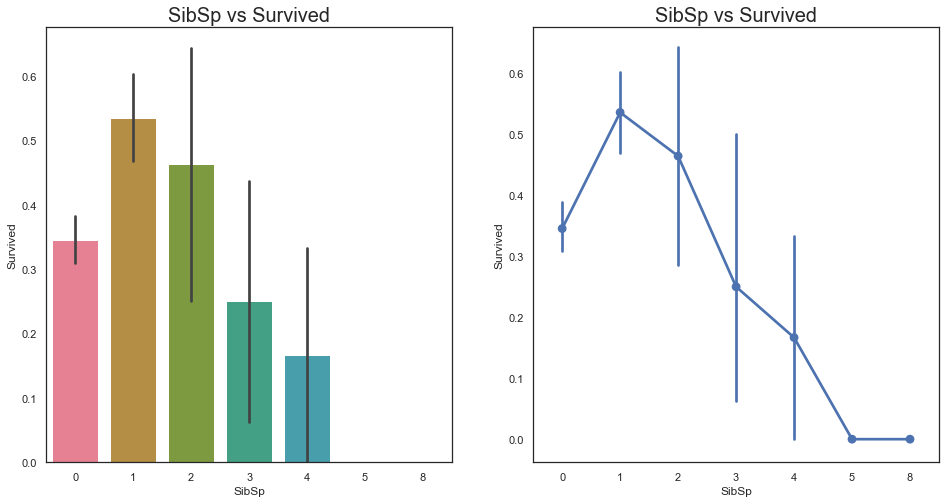

In [23]:
fig, ax = plt.subplots(1,2,figsize=[16,8])
sns.barplot(x='SibSp',y='Survived',data=df1,ax=ax[0],palette='husl')
ax[0].set_title('SibSp vs Survived',fontsize=20)

sns.pointplot(x='SibSp',y='Survived',data=df1,ax=ax[1])
ax[1].set_title('SibSp vs Survived',fontsize=20)
plt.show()

### Continuous
* **Age**

A **violin plot** plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.

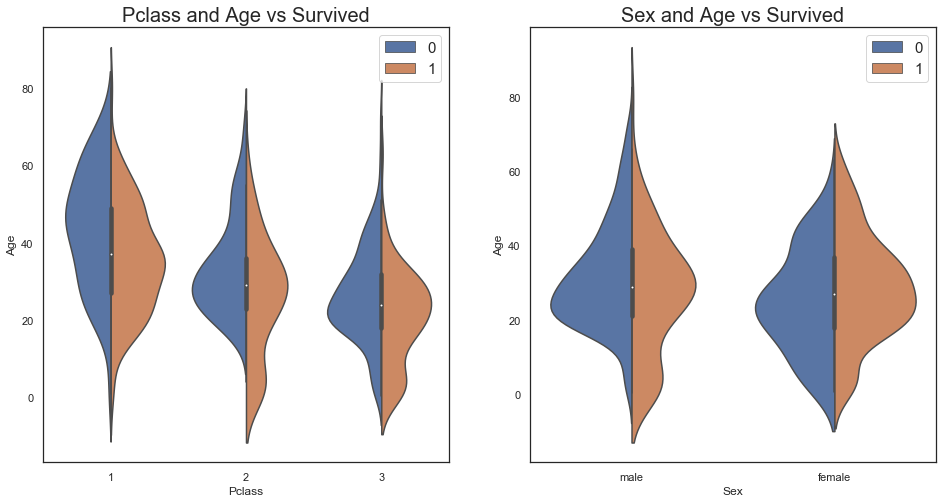

In [24]:
fig, ax = plt.subplots(1,2,figsize=[16,8])
sns.violinplot(x='Pclass', y='Age', hue='Survived',data=df1,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived',fontdict={'fontsize':'20'})
ax[0].legend(prop={'size': 15})

sns.violinplot('Sex','Age',hue='Survived',data=df1,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived',fontdict={'fontsize':'20'})
ax[1].legend(prop={'size': 15})

plt.show()

* **Fare**

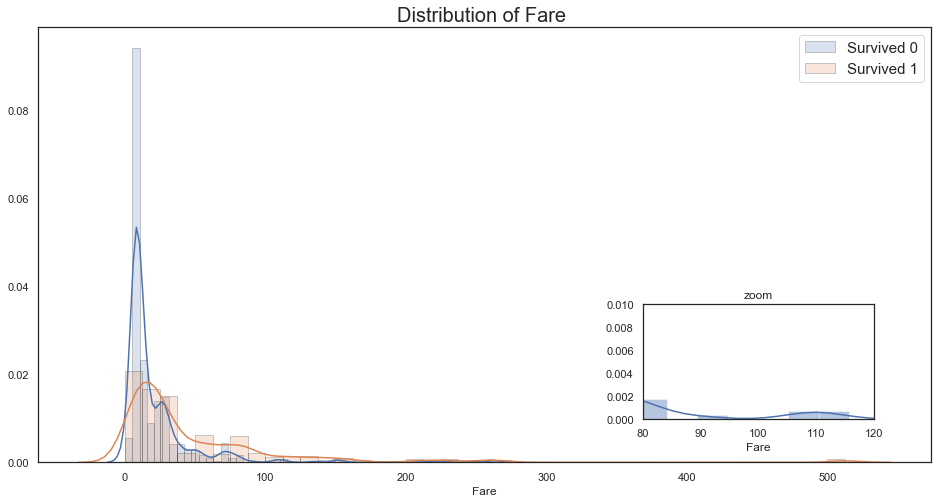

In [25]:
fig,ax = plt.subplots(figsize=[16,8])

sns.distplot(df1[df1['Survived']==0]['Fare'].dropna(),label='Survived 0',ax=ax,hist_kws = {'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2})
sns.distplot(df1[df1['Survived']==1]['Fare'].dropna(),label='Survived 1',ax=ax,hist_kws = {'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2})
ax.set_title('Distribution of Fare ', fontsize=20)
ax.legend(prop={'size':'15'})

ax2 = plt.axes([0.65, 0.2, .2, .2], facecolor='white') # left, bottom, width, height
sns.distplot(df1[df1['Survived']==0]['Fare'].dropna(), ax=ax2)
ax2.set_title('zoom')
ax2.set_xlim([80,120])
ax2.set_ylim([0,0.01])

plt.show()

**Correlation Between Numerical Features**

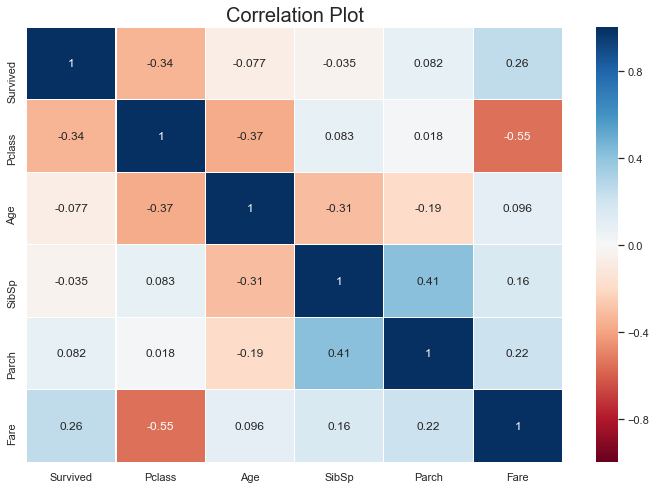

In [26]:
fig,ax = plt.subplots(figsize=[12,8])
sns.heatmap(num_features.corr(),annot=True, cmap='RdBu', linewidths=0.2,vmin=-1,vmax=1,center=0)
plt.title('Correlation Plot',fontsize=20)
plt.show()


**lmplot with regression line**

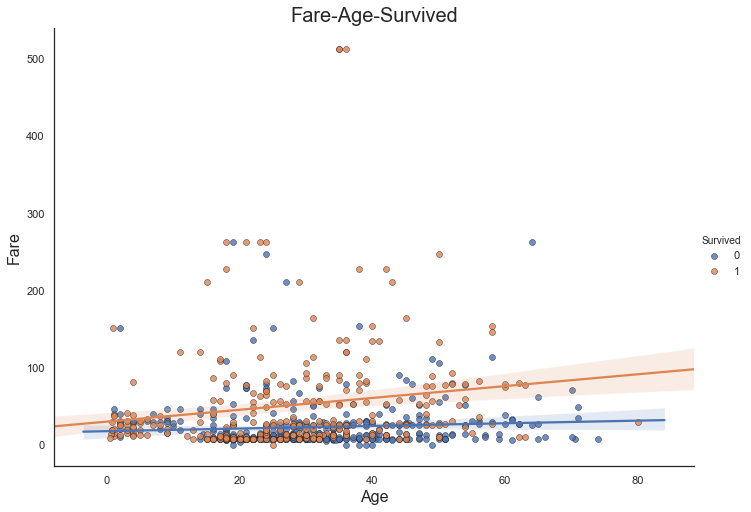

In [27]:
# Figure level
lm = sns.lmplot(x='Age', y='Fare', hue='Survived',height=7,aspect=1.4,data=df1, fit_reg=True,\
               legend=True,scatter_kws={'edgecolor':'k','linewidth':0.5})
# fig = lm.fig
# fig.suptitle('Fare-Age-Survived',fontsize=20) # or axex level
ax = plt.gca()
ax.set_title('Fare-Age-Survived',fontsize=20)

x_lab, y_lab = ax.get_xlabel(), ax.get_ylabel()
ax.set_xlabel(x_lab,fontdict = {'fontsize':'16'})
ax.set_ylabel(y_lab,fontdict = {'fontsize':'16'})
plt.show()

**Kernal Density Plot**

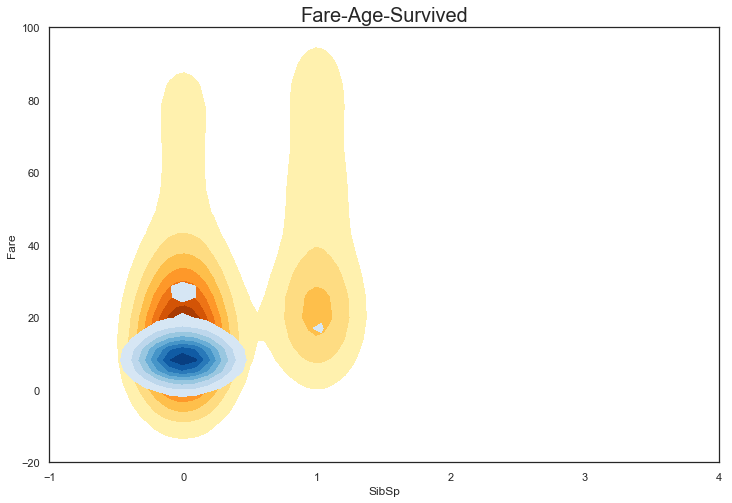

In [28]:
fig,ax = plt.subplots(figsize=[12,8])

survived = df1.loc[df1.Survived ==1]
dead = df1.loc[df1.Survived ==0]

sns.kdeplot(survived.SibSp,survived.Fare,cmap='YlOrBr',shade=True,shade_lowest=False,ax=ax)
sns.kdeplot(dead.SibSp,dead.Fare,cmap='Blues',shade=True,shade_lowest=False,ax=ax)

ax.set_title('Fare-Age-Survived',fontsize=20)
ax.set_xlim(-1,4)
ax.set_ylim(-20,100)

plt.show()

### Exercise and QA:
1. Create a bar plot using seaborn with x-axis is 'Pclass' and y-axis is 'Fare'
2. Create a figure with 2 axes, the left axes with the plot from question 1, and right axes with a countplot from seaborn, which counts the number of males and females for each class in 'Pclass'. (Hint: x-axis = 'Sex', hue = 'Pclass')
3. Add title to each subplots.